In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.svm import LinearSVR
import numpy as np
import seaborn as sn
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [8]:
#reading the data files 
hourly_data=pd.read_csv('hour.csv', na_values='?').dropna()
daily_data = pd.read_csv('day.csv', na_values='?').dropna()

In [9]:
#changing the yyyy-mm-dd format to dd so that it can be easily converted to int later
list_dh=[]
for i in hourly_data['dteday']:
    list1 = i.split('-')
    list_dh.append(int(list1[2]))
dfh = pd.DataFrame(list_dh, columns=['dteday'])
hourly_data[['dteday']]=dfh[['dteday']]

list_dd=[]
for i in daily_data['dteday']:
    list2 = i.split('-')
    list_dd.append(int(list2[2]))
dfd = pd.DataFrame(list_dd, columns=['dteday'])
daily_data[['dteday']]=dfd[['dteday']]

In [10]:
#remove outliers
def remove_outliers(data, type):
    print("\n\nShape of {} Data frame before removing Outliers: {}".format(type, data.shape))
    no_outliers = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
    print("Shape of {} Data frame after removing Outliers: {}\n".format(type, no_outliers.shape))
    return no_outliers

In [11]:
#Feature Selection
no_outliers=remove_outliers(hourly_data,'Hourly')
no_day_outliers=remove_outliers(daily_data,'Daily')




Shape of Hourly Data frame before removing Outliers: (17379, 17)
Shape of Hourly Data frame after removing Outliers: (15934, 17)



Shape of Daily Data frame before removing Outliers: (731, 16)
Shape of Daily Data frame after removing Outliers: (700, 16)



In [12]:
#correlation for features in hours dataset
print(hourly_data[['cnt','instant','dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','windspeed']].corr())

                 cnt   instant    dteday    season        yr      mnth  \
cnt         1.000000  0.278379 -0.004312  0.178056  0.250495  0.120638   
instant     0.278379  1.000000  0.047372  0.404046  0.866014  0.489164   
dteday     -0.004312  0.047372  1.000000 -0.003052  0.002057  0.007929   
season      0.178056  0.404046 -0.003052  1.000000 -0.010742  0.830386   
yr          0.250495  0.866014  0.002057 -0.010742  1.000000 -0.010473   
mnth        0.120638  0.489164  0.007929  0.830386 -0.010473  1.000000   
hr          0.394071 -0.004775  0.001538 -0.006117 -0.003867 -0.005772   
holiday    -0.030927  0.014723 -0.010132 -0.009585  0.006692  0.018430   
weekday     0.026900  0.001357  0.002145 -0.002335 -0.004485  0.010400   
workingday  0.030284 -0.003416  0.008627  0.013743 -0.002196 -0.003477   
weathersit -0.142426 -0.014198 -0.003882 -0.014524 -0.019157  0.005400   
temp        0.404772  0.136178  0.027180  0.312025  0.040913  0.201691   
atemp       0.400929  0.137615  0.0212

In [22]:
#Hours dataset feature selection

#removing statistically insignificant columns from the hour dataset
no_hour_outliers=remove_outliers(hourly_data,'Hourly')
y_hour = no_hour_outliers.cnt
x_hour = no_hour_outliers.drop(['cnt','casual','registered','instant','holiday','windspeed','atemp'],axis=1)




Shape of Hourly Data frame before removing Outliers: (17379, 17)
Shape of Hourly Data frame after removing Outliers: (15934, 17)



In [20]:
# Hours dataset after feature selection
x_hour.head()

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,hum
0,1,1,0,1,0,6,0,1,0.24,0.81
1,1,1,0,1,1,6,0,1,0.22,0.80
2,1,1,0,1,2,6,0,1,0.22,0.80
3,1,1,0,1,3,6,0,1,0.24,0.75
4,1,1,0,1,4,6,0,1,0.24,0.75


In [21]:
#correlation for features in day dataset
print(daily_data[['cnt','instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','windspeed']].corr())

                 cnt   instant    dteday    season        yr      mnth  \
cnt         1.000000  0.628830 -0.024204  0.406100  0.566710  0.279977   
instant     0.628830  1.000000  0.047990  0.412224  0.866025  0.496702   
dteday     -0.024204  0.047990  1.000000 -0.000861  0.002061  0.009157   
season      0.406100  0.412224 -0.000861  1.000000 -0.001844  0.831440   
yr          0.566710  0.866025  0.002061 -0.001844  1.000000 -0.001792   
mnth        0.279977  0.496702  0.009157  0.831440 -0.001792  1.000000   
holiday    -0.068348  0.016145 -0.010710 -0.010537  0.007954  0.019191   
weekday     0.067443 -0.000016 -0.000428 -0.003080 -0.005461  0.009509   
workingday  0.061156 -0.004337  0.009907  0.012485 -0.002013 -0.005901   
weathersit -0.297391 -0.021477 -0.023824  0.019211 -0.048727  0.043528   
temp        0.627494  0.150580  0.024253  0.334315  0.047604  0.220205   
atemp       0.631066  0.152638  0.018286  0.342876  0.046106  0.227459   
windspeed  -0.234545 -0.112620  0.0215

In [23]:
#Day dataset feature selection
from sklearn.linear_model import Lasso

#removing statistically insignificant columns from the day dataset
no_day_outliers=remove_outliers(daily_data,'Daily')
y_day = no_day_outliers.cnt
x_day = no_day_outliers.drop(['cnt','casual','registered','instant','holiday','dteday'],axis=1)

#Lasso regression for feature selection
for k in range(1,10):
    clf = Lasso(alpha = k/10)
    clf.fit(x_day,y_day)
    print('alpha', k/10)
    print(clf.coef_)
    print('\n')




Shape of Daily Data frame before removing Outliers: (731, 16)
Shape of Daily Data frame after removing Outliers: (700, 16)

alpha 0.1
[  504.96503532  2021.10560098   -33.49572884    62.90669181
   174.26363115  -601.47843052  2053.56789828  3416.06024
 -1121.43644723 -2570.04839815]


alpha 0.2
[  505.10517847  2021.18274964   -33.4778188     62.91884804
   173.9747916   -603.71102185  2067.87102523  3395.35396076
 -1107.51598428 -2548.31546244]


alpha 0.3
[  505.24532161  2021.2598983    -33.45990876    62.93100426
   173.68595205  -605.94361319  2082.17415218  3374.64768153
 -1093.59552134 -2526.58252673]


alpha 0.4
[  505.38546476  2021.33704696   -33.44199872    62.94316048
   173.3971125   -608.17620452  2096.47727913  3353.9414023
 -1079.6750584  -2504.84959101]


alpha 0.5
[  505.52560791  2021.41419562   -33.42408868    62.95531671
   173.10827294  -610.40879586  2110.78040607  3333.23512306
 -1065.75459545 -2483.1166553 ]


alpha 0.6
[  505.66575105  2021.49134428   -33.4

In [24]:
# Day dataset after feature selection
x_day.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900


In [25]:
# Data Visualization
y1 = no_outliers.cnt
x_hour1 = no_outliers 

a = x_hour1.head(24).hr.tolist()

b_casual = []
b_reg = []
b_total = []

for i in a:
    b_casual.append(0)
    b_reg.append(0)
    b_total.append(0)

for row in x_hour1.iterrows():  
    b_casual[int(row[1].values[5])%24] = b_casual[int(row[1].values[5])] + row[1].values[14]
    b_reg[int(row[1].values[5])%24] = b_reg[int(row[1].values[5])] + row[1].values[15]
    b_total[int(row[1].values[5])%24] = b_total[int(row[1].values[5])] + row[1].values[16]

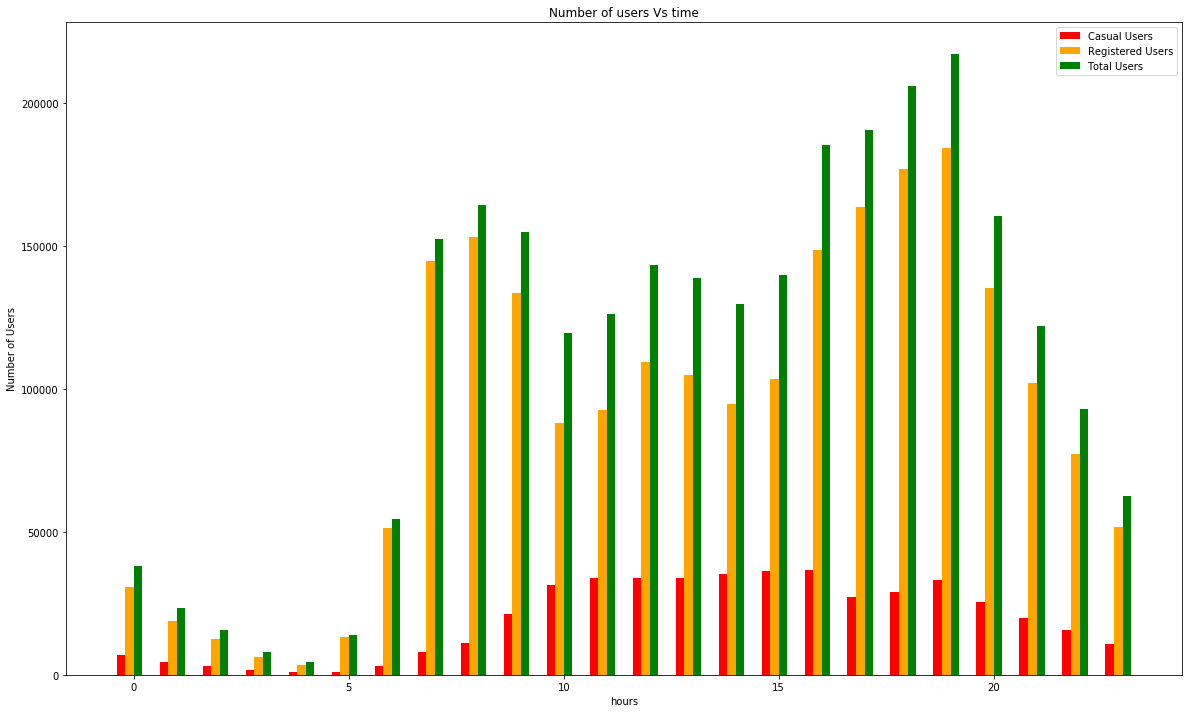

In [26]:
fig = plt.figure(figsize = (20,12))
p1 = plt.bar(a, b_casual, width = -0.4, align = 'edge', color = 'red')
p2 = plt.bar(a, b_reg, width = 0.4, color = 'orange')
p3 = plt.bar(a, b_total, width = 0.2, align = 'edge',color = 'green')

plt.ylabel('Number of Users')
plt.title('Number of users Vs time')
plt.xlabel('hours')
plt.legend((p1[0], p2[0], p3[0]), ('Casual Users', 'Registered Users', 'Total Users'))
plt.show()